#Pre procesamiento 1 aplicando filtros y data agumentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/Shareddrives/Darwin Project Datasets II/EyePACS dataset/dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/tmp')

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/Shareddrives/Darwin Project Datasets II/imagenes_preprocesadas.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/tmp')

18798_left.jpeg


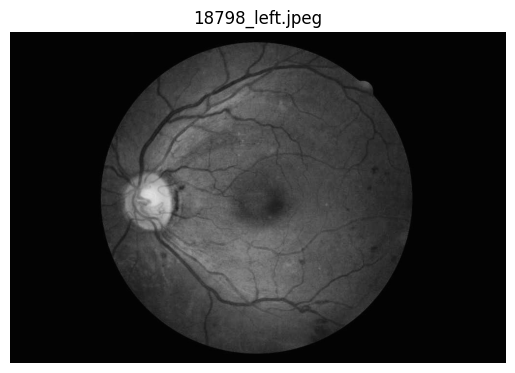

In [ ]:
import random
import os
import cv2
import matplotlib.pyplot as plt


def plot_random_image(folder_path):
    # Obtener la lista de imágenes en la carpeta
    image_list = [filename for filename in os.listdir(folder_path) if filename.endswith('.jpeg')]

    # Seleccionar una imagen aleatoria
    random_image = random.choice(image_list)
    image_path = os.path.join(folder_path, random_image)

    # Cargar y mostrar la imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(random_image)
    print(random_image)
    plt.show()

# Ruta de la carpeta con las imágenes
folder_path = '/tmp/train_clahe/4'

# Llamar a la función para graficar una imagen aleatoria
plot_random_image(folder_path)

In [ ]:
import os

def contar_archivos_en_carpeta(carpeta):
    # Obtener la lista de archivos en la carpeta
    archivos = os.listdir(carpeta)

    # Contar la cantidad de archivos
    cantidad_archivos = len(archivos)

    return cantidad_archivos

# Ruta a la carpeta que deseas contar los archivos
carpeta = '/tmp/images_crop_final/train/2'

# Obtener la cantidad de archivos en la carpeta
cantidad_archivos = contar_archivos_en_carpeta(carpeta)

print(f"La carpeta '{carpeta}' contiene {cantidad_archivos} archivos.")

La carpeta '/tmp/images_crop_final/train/2' contiene 5000 archivos.


In [ ]:
pip install git+https://github.com/aleju/imgaug.git

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-fs69ofu8
  Running command git clone --filter=blob:none --quiet https://github.com/aleju/imgaug.git /tmp/pip-req-build-fs69ofu8
  Resolved https://github.com/aleju/imgaug.git to commit 0101108d4fed06bc5056c4a03e2bcb0216dac326
  Preparing metadata (setup.py) ... done


In [ ]:
!pip uninstall matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? y
y
  Successfully uninstalled matplotlib-3.7.1


In [ ]:
!pip install matplotlib==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 60.4 MB/s eta 0:00:00


<ipython-input-119-736971d7ce77>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("/tmp/Imagenes prueba/descarga.png")


(373, 515, 4)
Original:


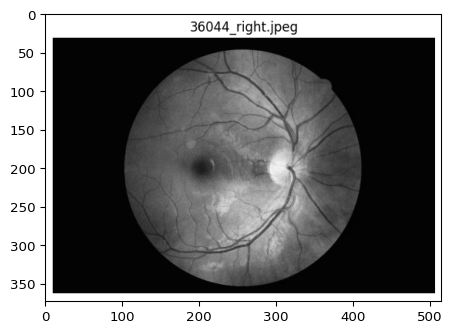

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import imgaug as ia

image = imageio.imread("/tmp/Imagenes prueba/descarga.png")
print(image.shape)
print("Original:")
ia.imshow(image)

Augmented:


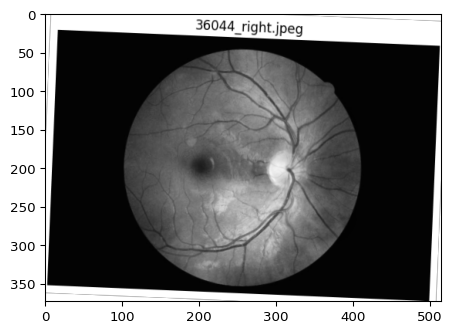

In [ ]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented:


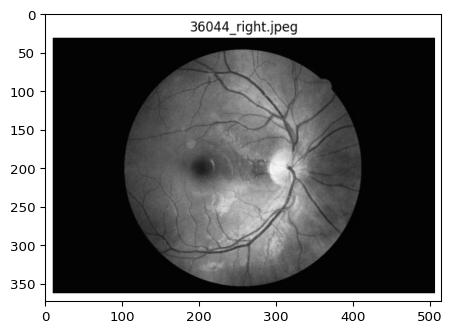

In [ ]:
from imgaug import augmenters as iaa


aug= iaa.Multiply((0.5, 1.5))
image_aug = aug(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented:


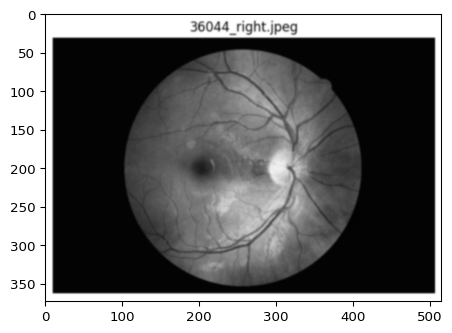

In [ ]:
aug = iaa.GaussianBlur(sigma=(0.0, 1.0))
image_aug = aug(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented:


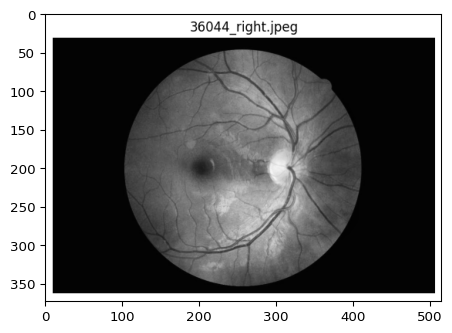

In [ ]:
aug = iaa.GammaContrast((0.5, 1.8))
image_aug = aug(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented:


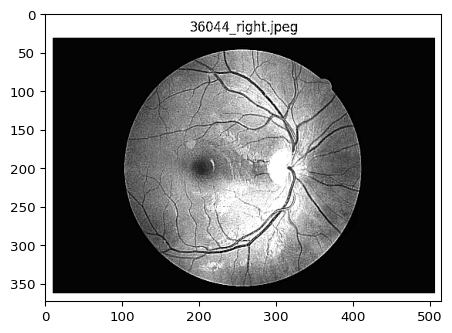

In [ ]:
#Sharper
aug = iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0))
image_aug = aug(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented:


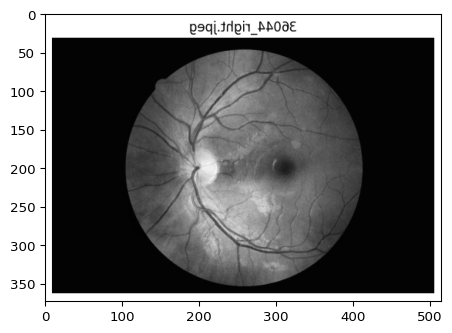

In [ ]:
aug = iaa.Fliplr(0.5)
image_aug = aug(image=image)

print("Augmented:")
ia.imshow(image_aug)

In [ ]:
from imgaug import augmenters as iaa
from PIL import Image

# Ruta del directorio que contiene las imágenes originales
original_images_dir = "/tmp/prueba/test_filtrado/4"

# Ruta del directorio donde se guardarán las imágenes aumentadas
augmented_images_dir = "/tmp/prueba/filtrado_aumentado/test/4"

# Crea el directorio si no existe
os.makedirs(augmented_images_dir, exist_ok=True)

# Lista para almacenar las rutas de las imágenes originales
original_image_paths = []

# Obtén las rutas de las imágenes originales
for filename in os.listdir(original_images_dir):
    if filename.endswith(".jpeg") or filename.endswith(".png"):
        original_image_path = os.path.join(original_images_dir, filename)
        original_image_paths.append(original_image_path)

# Número de imágenes deseadas después de la data augmentation, incluyendo las originales
target_num_images = 1200

# Crea el objeto de aumento personalizado
augmenter = iaa.SomeOf((1, 3), [
    iaa.Multiply((0.5, 1.5)),          # Multiplicación de colores aleatoria
    #iaa.GaussianBlur(sigma=(0, 1.0)),  # Desenfoque gaussiano con sigma aleatorio
    iaa.GammaContrast(gamma=(0.5, 1.8)), # Ajuste de gamma y contraste aleatorio
    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0)),
    iaa.Fliplr(0.5)
])

# Contador para el número total de imágenes generadas, incluyendo las originales
total_generated_images = 0

# Aplica el aumento a cada imagen y guárdala hasta alcanzar el número deseado
for original_image_path in original_image_paths:
    # Verifica si se han generado suficientes imágenes
    if total_generated_images >= target_num_images:
        break

    # Abre la imagen original
    image = Image.open(original_image_path)

    # Guarda la imagen original
    original_filename = os.path.splitext(os.path.basename(original_image_path))[0]
    original_filepath = os.path.join(augmented_images_dir, f"{original_filename}.jpg")
    image.save(original_filepath)

    # Incrementa el contador de imágenes generadas
    total_generated_images += 1

    # Genera imágenes aumentadas adicionales
    additional_images_to_generate = target_num_images - total_generated_images

    if additional_images_to_generate > 0:
        # Convierte la imagen en una matriz NumPy
        image_np = np.array(image)

        # Genera un nuevo nombre de archivo para cada imagen aumentada
        original_filename = os.path.splitext(os.path.basename(original_image_path))[0]

        for i in range(additional_images_to_generate):
            # Aplica las transformaciones de aumento a la imagen original
            augmented_image_np = augmenter.augment_image(image_np)

            # Convierte la imagen aumentada de vuelta a PIL Image
            augmented_image = Image.fromarray(augmented_image_np)

            # Genera un nuevo nombre de archivo para cada imagen aumentada
            new_filename = f"augmented_{original_filename}_{total_generated_images}.jpg"
            new_filepath = os.path.join(augmented_images_dir, new_filename)

            # Guarda la imagen aumentada
            augmented_image.save(new_filepath)

            # Incrementa el contador de imágenes generadas
            total_generated_images += 1

    # Cierra la imagen original
    image.close()

In [ ]:
# Ruta del directorio que contiene las imágenes originales
original_images_dir = "/tmp/train_clahe/3"

# Ruta del directorio donde se guardarán las imágenes aumentadas
augmented_images_dir = "/tmp/Imagenes prueba/train/train_3"

# Crea el directorio si no existe
os.makedirs(augmented_images_dir, exist_ok=True)

# Lista para almacenar las rutas de las imágenes originales
original_image_paths = []

# Obtén las rutas de las imágenes originales
for filename in os.listdir(original_images_dir):
    if filename.endswith(".jpeg") or filename.endswith(".png"):
        original_image_path = os.path.join(original_images_dir, filename)
        original_image_paths.append(original_image_path)

# Número de imágenes deseadas después de la data augmentation, incluyendo las originales
target_num_images = 5000

# Crea el objeto de aumento personalizado
augmenter = iaa.SomeOf((1, 2), [
    iaa.Multiply((0.5, 1.5)),          # Multiplicación de colores aleatoria
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Desenfoque gaussiano con sigma aleatorio
    iaa.GammaContrast(gamma=(0.5, 2.0)), # Ajuste de gamma y contraste aleatorio
    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0)),
    iaa.Fliplr(0.5)
])

# Contador para el número total de imágenes generadas, incluyendo las originales
total_generated_images = 0

# Aplica el aumento a cada imagen y guárdala hasta alcanzar el número deseado
for original_image_path in original_image_paths:
    # Verifica si se han generado suficientes imágenes
    if total_generated_images >= target_num_images:
        break

    # Abre la imagen original
    image = Image.open(original_image_path)

    # Verifica el nivel de brillo de la imagen
    brightness_threshold = 84  # Ajusta este valor según tu criterio
    reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)

    # Aplica CLAHE a la imagen de referencia
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    reference_image_clahe = clahe.apply(reference_image)

    brightness = int(np.mean(reference_image_clahe))  # Calcula el brillo promedio

    if brightness < brightness_threshold:
        # La imagen es muy oscura, no se realiza data augmentation
        image_filepath = os.path.join(augmented_images_dir, f"{os.path.basename(original_image_path)}.jpg")
        image.save(image_filepath)

        # Incrementa el contador de imágenes generadas
        total_generated_images += 1
    else:
        # La imagen no es muy oscura, se aplica data augmentation
        additional_images_to_generate = target_num_images - total_generated_images

        if additional_images_to_generate > 0:
            # Genera un nuevo nombre de archivo para cada imagen aumentada
            original_filename = os.path.splitext(os.path.basename(original_image_path))[0]

            for i in range(additional_images_to_generate):
                # Aplica las transformaciones de aumento a la imagen original
                augmented_image = augmenter.augment_image(image)

                # Genera un nuevo nombre de archivo para cada imagen aumentada
                new_filename = f"augmented_{original_filename}_{total_generated_images}.jpg"
                new_filepath = os.path.join(augmented_images_dir, new_filename)

                # Guarda la imagen aumentada
                augmented_image.save(new_filepath)

                # Incrementa el contador de imágenes generadas
                total_generated_images += 1

    # Cierra la imagen original
    image.close()

In [ ]:
from PIL import Image
# Ruta de la imagen de referencia
reference_image_path = "/tmp/Imagenes prueba/descarga (1).png"

# Carga la imagen de referencia utilizando OpenCV para preservar la transformación CLAHE
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)

# Aplica CLAHE a la imagen de referencia
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
reference_image_clahe = clahe.apply(reference_image)

# Calcula el nivel de brillo promedio de la imagen de referencia después de CLAHE
brightness_threshold = int(np.mean(reference_image_clahe))

print(f"Nivel de brillo promedio de la imagen de referencia: {brightness_threshold}")

Nivel de brillo promedio de la imagen de referencia: 70


In [ ]:
import zipfile
import shutil
from google.colab import drive

# Montar Google Drive
#drive.mount('/content/drive')

# Directorio de origen (carpeta a comprimir)
source_directory = '/tmp/Imagenes aumentadas'

# Directorio de destino en Google Drive
destination_directory = '/content/drive/Shareddrives/Darwin Project Datasets II'

# Ruta del archivo zip
zip_file_path = '/tmp/Imagenes aumentadas.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_path[:-4], 'zip', source_directory)

# Mover el archivo zip al directorio de Google Drive
shutil.move(zip_file_path, destination_directory)
#drive.flush_and_unmount()

'/content/drive/Shareddrives/Darwin Project Datasets II/Imagenes aumentadas.zip'

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/Shareddrives/Darwin Project Datasets II/Imagenes aumentadas.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/tmp')

In [ ]:
import os
from PIL import Image

# Directorio de entrada (imágenes originales)
directorio_entrada = '/tmp/prueba/filtrado_aumentado/test/4'

# Directorio de salida (imágenes redimensionadas)
directorio_salida = '/tmp/prueba/filtrado_aumentado_cortado/test/4'

# Tamaño deseado para el lado más largo
lado_mas_largo_deseado = 800

# Obtener la lista de archivos en el directorio de entrada
archivos = os.listdir(directorio_entrada)

# Filtrar solo los archivos de imagen (puedes agregar más extensiones si es necesario)
archivos_imagen = [archivo for archivo in archivos if archivo.endswith(('.jpg', '.jpeg', '.png'))]

# Recorrer cada imagen y redimensionarla
for archivo_imagen in archivos_imagen:
    # Ruta completa de la imagen de entrada
    ruta_imagen_entrada = os.path.join(directorio_entrada, archivo_imagen)

    # Ruta completa de la imagen de salida
    ruta_imagen_salida = os.path.join(directorio_salida, archivo_imagen)

    # Abrir la imagen original
    imagen_original = Image.open(ruta_imagen_entrada)

    # Obtener el ancho y alto de la imagen original
    ancho_original, alto_original = imagen_original.size

    # Calcular el nuevo tamaño manteniendo la relación de aspecto
    if ancho_original >= alto_original:
        # Si el ancho es mayor o igual que el alto
        nuevo_ancho = lado_mas_largo_deseado
        nuevo_alto = int(alto_original * lado_mas_largo_deseado / ancho_original)
    else:
        # Si el alto es mayor que el ancho
        nuevo_ancho = int(ancho_original * lado_mas_largo_deseado / alto_original)
        nuevo_alto = lado_mas_largo_deseado

    # Redimensionar la imagen manteniendo la relación de aspecto
    imagen_redimensionada = imagen_original.resize((nuevo_ancho, nuevo_alto), Image.ANTIALIAS)

    # Guardar la imagen redimensionada en el directorio de salida
    imagen_redimensionada.save(ruta_imagen_salida)

In [ ]:
import zipfile
import shutil
from google.colab import drive

# Montar Google Drive
#drive.mount('/content/drive')

# Directorio de origen (carpeta a comprimir)
source_directory = '/tmp/prueba/filtrado_aumentado_cortado'

# Directorio de destino en Google Drive
destination_directory = '/content/drive/Shareddrives/Darwin Project Datasets II'

# Ruta del archivo zip
zip_file_path = '/tmp/prueba/filtrado_aumentado_cortado.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(zip_file_path[:-4], 'zip', source_directory)

# Mover el archivo zip al directorio de Google Drive
shutil.move(zip_file_path, destination_directory)
#drive.flush_and_unmount()

'/content/drive/Shareddrives/Darwin Project Datasets II/filtrado_aumentado_cortado.zip'

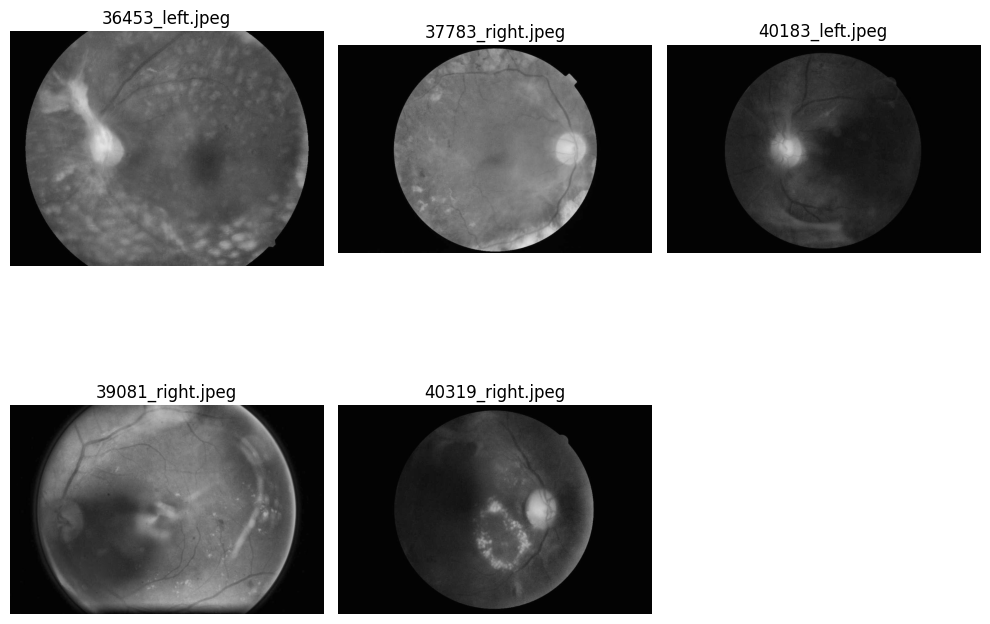

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def graficar_imagenes_azar(carpeta, cantidad=5):
    # Obtener la lista de imágenes en la carpeta
    archivos = os.listdir(carpeta)

    # Seleccionar imágenes al azar
    imagenes_azar = random.sample(archivos, cantidad)

    # Crear una figura para mostrar las imágenes
    fig = plt.figure(figsize=(10, 8))

    # Graficar las imágenes seleccionadas
    for i, imagen in enumerate(imagenes_azar):
        imagen_path = os.path.join(carpeta, imagen)
        img = cv2.imread(imagen_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = fig.add_subplot(2, 3, i+1)
        ax.imshow(img)
        ax.set_title(imagen)
        ax.axis('off')

    # Ajustar el espacio entre las imágenes
    fig.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Ruta a la carpeta que contiene las imágenes
carpeta_imagenes = '/tmp/test_clahe/4'

# Graficar 5 imágenes al azar de la carpeta
graficar_imagenes_azar(carpeta_imagenes, cantidad=5)

#Preprocesamiento, con prueba de calidad para las imagenes

1) Calculate the blurring index using estimator operator
2) For estimating the contrast we make use of the variance as a measure of the quality of the image using Michelson Contrast ratio filtering out images with high variance
3) Additionally, we performed an SNR test using the methods proposed by Lagendijk and Biemond to determine wheter or not as image is well suited for the data augmentation and training phases

Índice de desenfoque A : 25.41999559361782


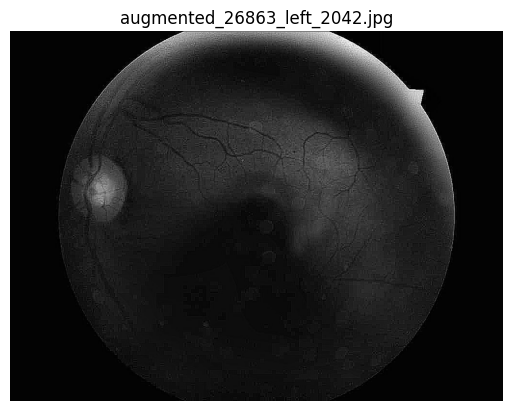

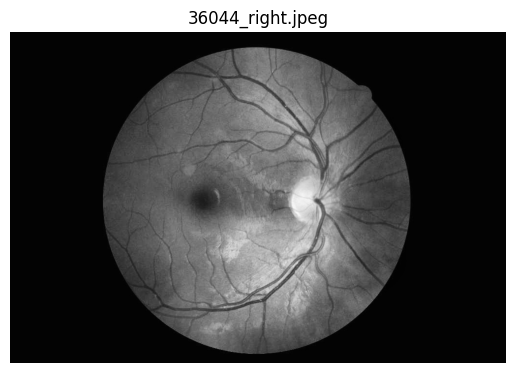

Índice de desenfoque B : 19.042686851225124


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_a = cv2.imread('/tmp/prueba/descarga (1).png', 0)  # Lee la imagen en escala de grises
image_b = cv2.imread('/tmp/prueba/descarga.png', 0)
estimator_operator = cv2.Laplacian(image_a, cv2.CV_64F).var()
std_deviation = np.std(image_a)
blurring_index = estimator_operator / std_deviation

print("Índice de desenfoque A :", blurring_index)

estimator_operator_b = cv2.Laplacian(image_b, cv2.CV_64F).var()
std_deviation_b = np.std(image_b)
blurring_index_b = estimator_operator_b / std_deviation_b

cv2_imshow(image_a)
cv2_imshow(image_b)


print("Índice de desenfoque B :", blurring_index_b)

In [ ]:
#calcular la variancia utilizando np.var()
variance = np.var(image_a)
print(variance)


6574.7138667885765


In [ ]:
variance = np.var(image_b)
print(variance)

7917.746956292103


In [ ]:
mean = np.mean(image_a)
std_dev = np.std(image_a)
snr = 20 * np.log10(mean / std_dev)
print(snr)

threshold = 20  # Adjust this threshold according to your needs

if snr >= threshold:
    print("Image has a high SNR. It is well suited for data augmentation and training.")
    # Proceed with data augmentation and training
else:
    print("Image has a low SNR. It may not be well suited for data augmentation and training.")
    # Consider excluding the image or applying additional preprocessing

-3.4778313054892527
Image has a low SNR. It may not be well suited for data augmentation and training.


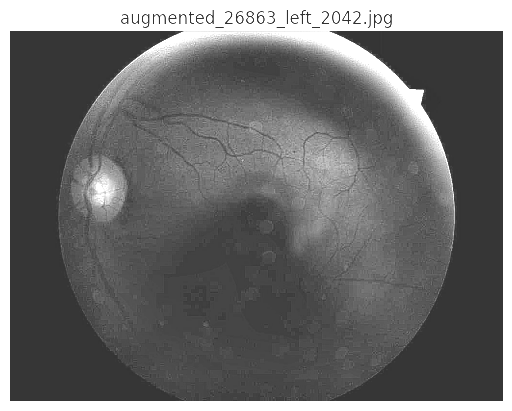

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/tmp/prueba/descarga (1).png', 0)  # Lee la imagen en escala de grises

# Aplica CLAHE a la imagen con parámetros personalizados
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#image_clahe = clahe.apply(image)

# Aumenta el contraste y el brillo de la imagen manualmente
alpha = 1.5  # Factor de contraste (ajusta según sea necesario)
beta = 50  # Valor de brillo (ajusta según sea necesario)
image_adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Muestra la imagen ajustada
cv2_imshow(image_adjusted)


#Dataframe

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np

In [ ]:
carpeta_imagenes = '/tmp/train_clahe/4'

nombres_imagenes = []
indices_desenfoque = []
indices_snr = []
brillos_promedio = []

for imagen in os.listdir(carpeta_imagenes):
    # Lee la imagen preprocesada con CLAHE
    ruta_imagen = os.path.join(carpeta_imagenes, imagen)
    image = cv2.imread(ruta_imagen, 0)

    # Calcula el índice de desenfoque
    desenfoque = cv2.Laplacian(image, cv2.CV_64F).var()

    # Calcula el índice de SNR
    mean = np.mean(image)
    std_dev = np.std(image)
    snr = 20 * np.log10(mean / std_dev)

    # Calcula el brillo promedio
    brillo_promedio = np.mean(image)

    # Agrega los datos a las listas correspondientes
    nombres_imagenes.append(imagen)
    indices_desenfoque.append(desenfoque)
    indices_snr.append(snr)
    brillos_promedio.append(brillo_promedio)

data = {
    'Nombre de la Imagen': nombres_imagenes,
    'Índice de Desenfoque': indices_desenfoque,
    'Índice de SNR': indices_snr,
    'Brillo Promedio': brillos_promedio
}

df_4 = pd.DataFrame(data)

In [ ]:
df_4.head()


,Nombre de la Imagen,Índice de Desenfoque,Índice de SNR,Brillo Promedio
0,19588_left.jpeg,31.672814,3.993968,66.132660
1,17453_left.jpeg,88.447531,1.477387,69.634860
2,17221_right.jpeg,46.903529,2.576544,56.889611
3,10312_left.jpeg,146.187303,0.220496,63.467233
4,20458_right.jpeg,30.129461,-0.405178,38.981949


In [ ]:
df_4.tail()

,Nombre de la Imagen,Índice de Desenfoque,Índice de SNR,Brillo Promedio
552,8743_right.jpeg,17.662783,3.963775,91.979592
553,294_right.jpeg,79.410685,-0.626271,57.937516
554,17925_left.jpeg,68.281931,-1.342150,52.426379
555,16392_right.jpeg,123.117203,3.869413,105.786417
556,1084_right.jpeg,38.026369,3.779679,86.178241


In [ ]:
estadisticas = df_4['Índice de Desenfoque'].describe()
print(estadisticas)

count     557.000000
mean       85.419393
std       154.072113
min         9.893411
25%        28.400336
50%        55.712241
75%       105.859810
max      2421.324368
Name: Índice de Desenfoque, dtype: float64


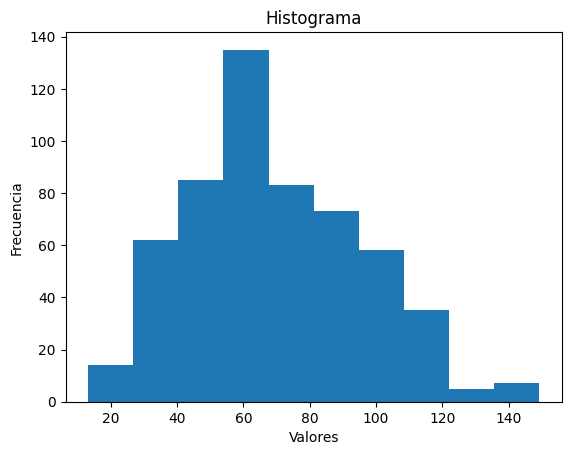

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma utilizando matplotlib
plt.hist(df_4['Brillo Promedio'], bins=10)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()



In [ ]:
import pandas as pd

df_4 = pd.read_csv('/tmp/prueba/df_4.csv')

In [ ]:
# Filtrar los datos que cumplan con las condiciones
filtro = (df_4['Índice de SNR'] > 1) & (df_4['Brillo Promedio'] >40) & (df_4['Brillo Promedio']<50)
datos_filtrados = df_4[filtro]

# Mostrar los datos filtrados
print(datos_filtrados)

    Nombre de la Imagen  Índice de Desenfoque  Índice de SNR  Brillo Promedio
47     23831_right.jpeg             56.001930       1.821921        49.813236
60      17426_left.jpeg             26.546501       2.438799        41.232305
78     17426_right.jpeg             24.852958       2.055106        42.680633
153     12861_left.jpeg             20.877948       1.855728        40.610966
155    34152_right.jpeg             82.523520       3.629053        46.605838
169     31729_left.jpeg             79.598240       2.638841        47.729692
183     16802_left.jpeg             97.374857       3.502581        42.688931
274    30747_right.jpeg             29.439676       4.012320        41.939778
283     25080_left.jpeg             77.529942       1.764540        48.447652
316    25378_right.jpeg             82.514634       3.391027        44.781673
320     13999_left.jpeg             45.054850       2.525673        43.028613
410    13999_right.jpeg             32.003948       3.348513    

desenfoque:  2061.1704113442825
indice SNR:  -3.4778313054892527
brillo promedio 54.33089549118005


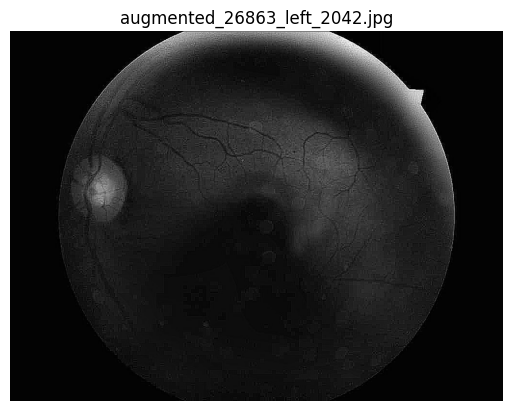

()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
#18798_left.jpeg
r = '/tmp/prueba/train_filtrado/descarga (1).png'
medidas_1(r)
graficar_imagen(r)

#

desenfoque:  36.85018987920937
indice SNR:  -0.8981237328724418
brillo promedio 35.949120092880676


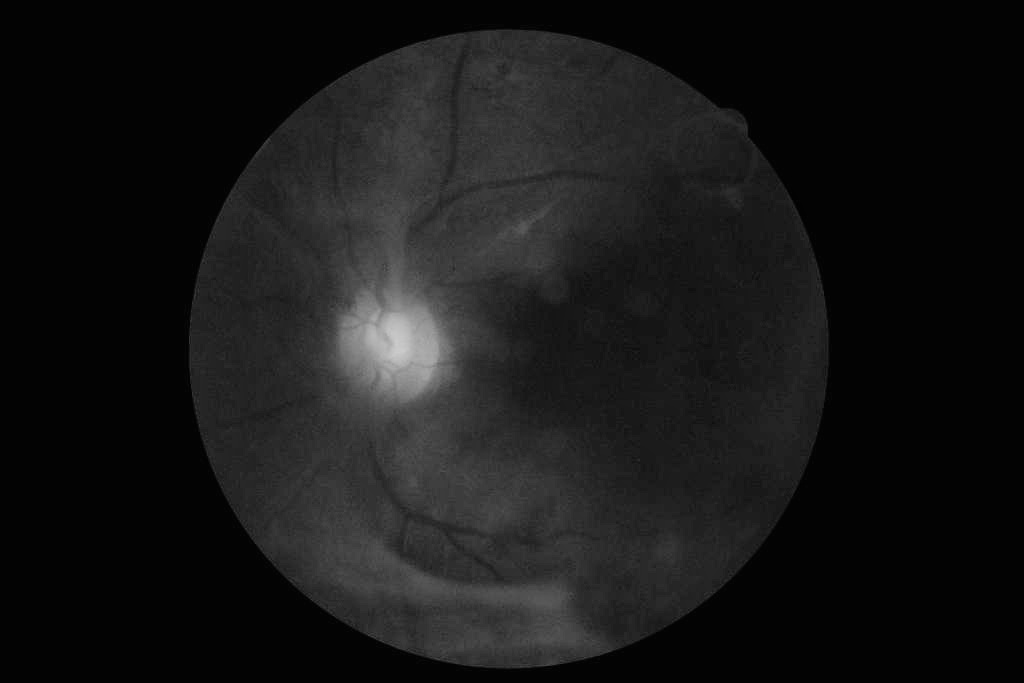

In [ ]:
#filtro = (df_4['Índice de SNR'] < 2) & (df_4['Índice de SNR'] >= 1) & (df_4['Brillo Promedio'] < 40)
ruta = '/tmp/train_clahe/4/18798_left.jpeg'

graficar_imagen(ruta)
medidas(ruta)
cv2_imshow(image)


In [ ]:
def graficar_imagen(ruta):
  image = cv2.imread(ruta, 0)
  cv2_imshow(image)
  return()

In [ ]:
def medidas_1(ruta):
  image = cv2.imread(ruta, 0)
  desenfoque = cv2.Laplacian(image, cv2.CV_64F).var()
  print('desenfoque: ', desenfoque)
  mean = np.mean(image)
  std_dev = np.std(image)
  snr = 20 * np.log10(mean / std_dev)
  print('indice SNR: ', snr)
  # Calcula el brillo promedio
  brillo_promedio = np.mean(image)
  print('brillo promedio', brillo_promedio)
  return(snr, brillo_promedio)



In [ ]:
# Lee la imagen preprocesada con CLAHE
ruta_imagen = '/tmp/test_clahe/4/40183_left.jpeg'
image = cv2.imread(ruta_imagen, 0)

cv2_imshow(image)
# Calcula el índice de desenfoque
desenfoque = cv2.Laplacian(image, cv2.CV_64F).var()
print('desenfoque: ', desenfoque)
# Calcula el índice de SNR
mean = np.mean(image)
std_dev = np.std(image)
snr = 20 * np.log10(mean / std_dev)
print('indice SNR: ', snr)

# Calcula el brillo promedio
brillo_promedio = np.mean(image)
print('brillo promedio', brillo_promedio)

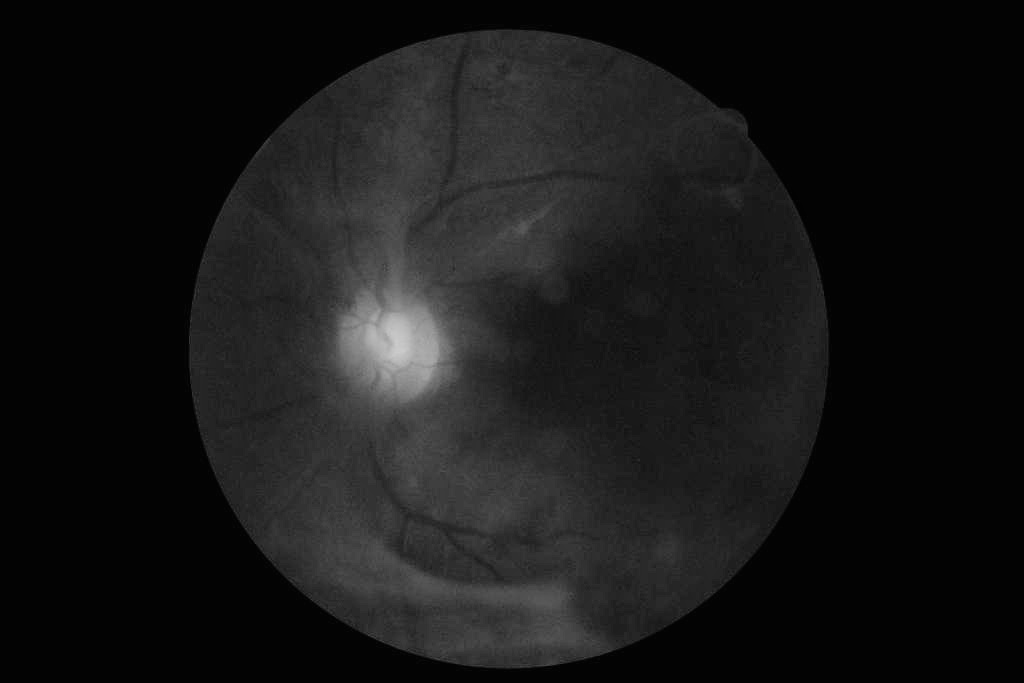

In [ ]:
# filtro = (df_4['Índice de SNR'] < 1) & (df_4['Brillo Promedio'] < 40)

path = '/tmp/train_clahe/4/7992_left.jpeg'
image = cv2.imread(ruta_imagen, 0)
cv2_imshow(image)

#Filtrado de imagenes con discriminacion basado en SNR, y brillo

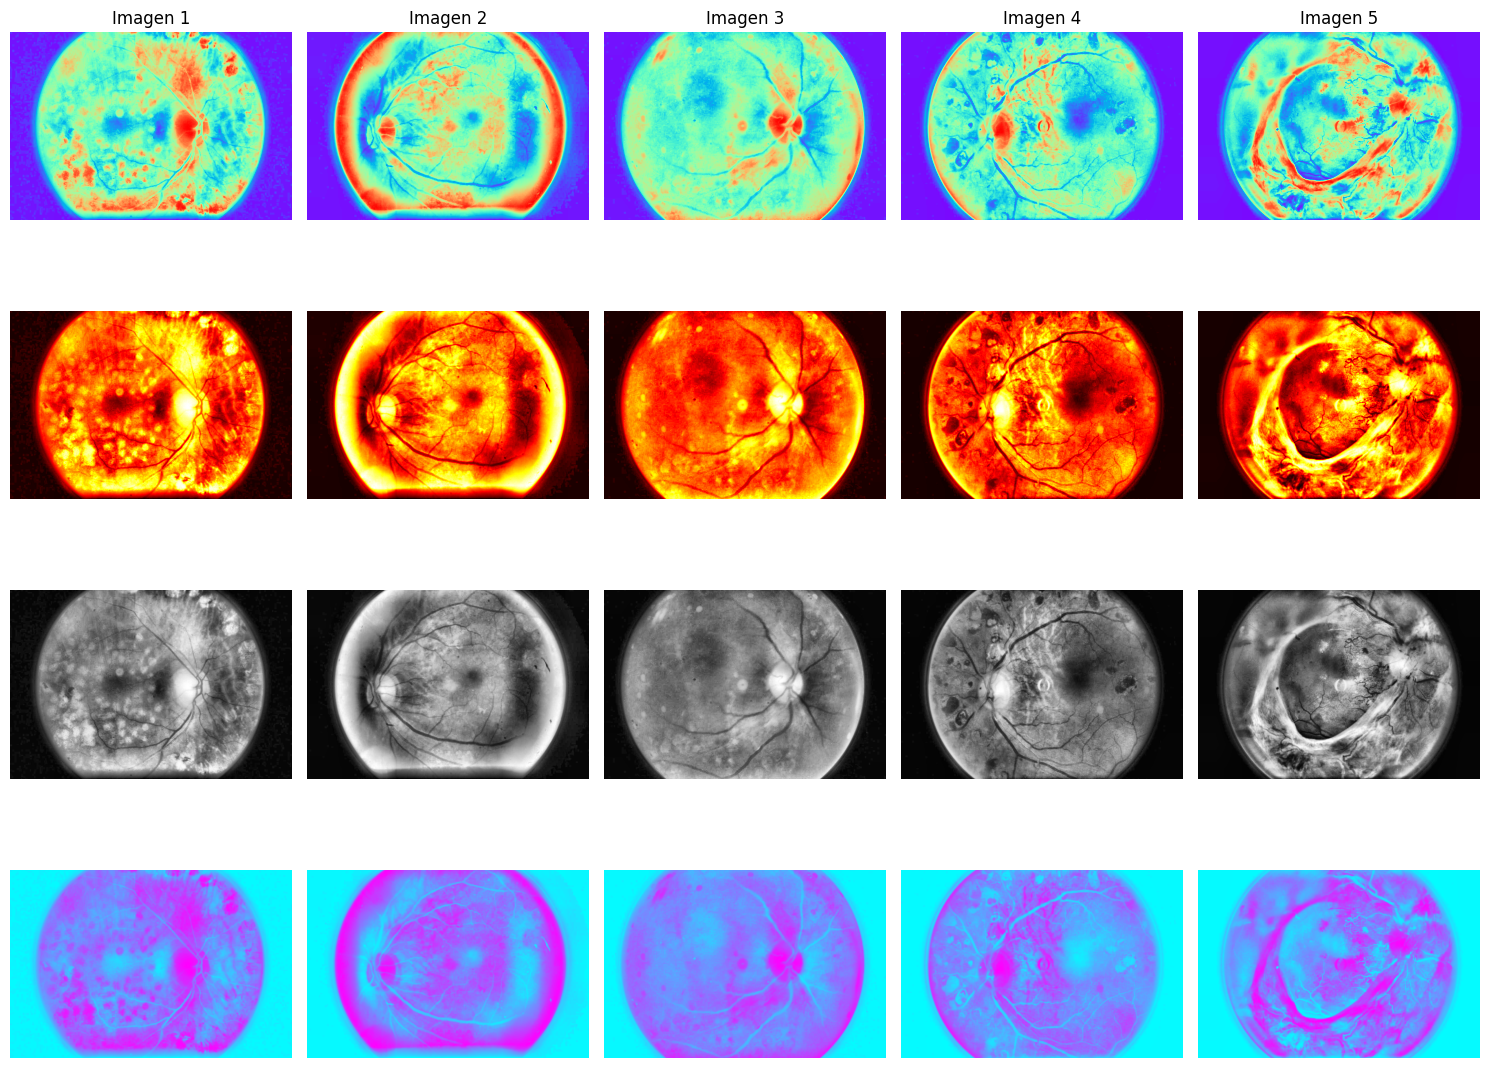

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def aplicar_filtro_clahe(imagen):
    # Aplicar el filtro CLAHE a la imagen
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    imagen_clahe = clahe.apply(imagen)
    return imagen_clahe

def graficar_imagenes_aleatorias(directorio):
    # Obtener una lista de las imágenes en el directorio
    lista_imagenes = os.listdir(directorio)

    # Seleccionar 5 imágenes aleatorias
    imagenes_seleccionadas = random.sample(lista_imagenes, 5)

    # Crear una figura y los subplots para las imágenes con diferentes paletas de colores
    fig, axs = plt.subplots(4, 5, figsize=(15, 12))

    paletas = ['rainbow', 'hot', 'gray', 'cool']

    # Iterar sobre las paletas de colores
    for i, paleta in enumerate(paletas):
        # Iterar sobre las imágenes seleccionadas y mostrarlas en los subplots
        for j, imagen in enumerate(imagenes_seleccionadas):
            ruta_imagen = os.path.join(directorio, imagen)
            img = mpimg.imread(ruta_imagen)

            # Aplicar el filtro CLAHE a la imagen
            img_clahe = aplicar_filtro_clahe(img)

            axs[i, j].imshow(img_clahe, cmap=paleta)
            axs[i, j].axis('off')

            if i == 0:
                axs[i, j].set_title(f'Imagen {j+1}')

    # Establecer los títulos de las filas correspondientes a las paletas de colores
    axs[0, 0].set_ylabel('Rainbow', rotation=90, size='large')
    axs[1, 0].set_ylabel('Hot', rotation=90, size='large')
    axs[2, 0].set_ylabel('Gray', rotation=90, size='large')
    axs[3, 0].set_ylabel('Cool', rotation=90, size='large')

    # Ajustar el espacio entre los subplots
    plt.tight_layout()
    plt.show()

# Directorio de donde se obtendrán las imágenes
directorio = "/tmp/prueba/train_filtrado/4"

# Llamar a la función para graficar las imágenes aleatorias con diferentes paletas de colores
graficar_imagenes_aleatorias(directorio)

In [ ]:
import os
import cv2

def medidas(ruta):
  image = cv2.imread(ruta, 0)
  #desenfoque = cv2.Laplacian(image, cv2.CV_64F).var()
  #print('desenfoque: ', desenfoque)
  mean = np.mean(image)
  std_dev = np.std(image)
  snr = 20 * np.log10(mean / std_dev)
  #print('indice SNR: ', snr)
  # Calcula el brillo promedio
  brillo_promedio = np.mean(image)
  #print('brillo promedio', brillo_promedio)
  return(snr, brillo_promedio)



def calcular_brillo(imagen):
    # Calcula el nivel de brillo de la imagen
    # Puedes implementar tu propia función para calcular el brillo según tus necesidades
    # Aquí se utiliza el método de luminancia promedio
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    return cv2.mean(imagen_gris)[0]

def filtrar_imagenes_por_brillo_y_snr(origen, destino, brillo_minimo, snr_minimo):
    # Comprueba si el directorio de destino existe, de lo contrario, créalo
    if not os.path.exists(destino):
        os.makedirs(destino)

    # Lee todas las imágenes en el directorio de origen
    for nombre_archivo in os.listdir(origen):
        ruta_archivo = os.path.join(origen, nombre_archivo)
        if os.path.isfile(ruta_archivo):
            imagen = cv2.imread(ruta_archivo)

            # Calcula el brillo y el SNR de la imagen
            snr, brillo = medidas(ruta_archivo)
            #print(snr, brillo)
            #brillo = calcular_brillo(imagen)
            #snr = calcular_snr(imagen)

            # Filtra la imagen en base al nivel de brillo y SNR mínimo
            if brillo >= brillo_minimo and snr >= snr_minimo:
                # Mueve la imagen al directorio de destino
                destino_archivo = os.path.join(destino, nombre_archivo)
                os.rename(ruta_archivo, destino_archivo)
                #print(f"La imagen {nombre_archivo} ha sido movida al directorio de destino.")
            #else:
                #print(f"La imagen {nombre_archivo} no cumple con los criterios de filtrado.")

# Directorio de origen y destino
origen = "/tmp/test_clahe/4"
destino = "/tmp/prueba/test_filtrado/4"

# Nivel de brillo y SNR mínimo
brillo_minimo = 40  # Ajusta este valor según tus necesidades
snr_minimo = 1     # Ajusta este valor según tus necesidades

# Filtra y mueve las imágenes
filtrar_imagenes_por_brillo_y_snr(origen, destino, brillo_minimo, snr_minimo)

In [ ]:
import os

def contar_archivos_carpeta(directorio):
    lista_archivos = os.listdir(directorio)
    cantidad_archivos = len(lista_archivos)
    return cantidad_archivos

# Directorio del que se contarán los archivos
directorio = "/tmp/prueba/filtrado_aumentado_cortado/test/4"

# Llamar a la función para contar la cantidad de archivos
cantidad_archivos = contar_archivos_carpeta(directorio)

print(f"La cantidad de archivos en la carpeta es: {cantidad_archivos}")

La cantidad de archivos en la carpeta es: 1200
